In [13]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

from netCDF4 import Dataset
from xmitgcm import open_mdsdataset
import time


In [2]:
SVB = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

SVB_bar = xr.open_dataset('curtain_SSH_SVB_Barotropic.nc')
noSVB_bar = xr.open_dataset('curtain_SSH_NoSVB_Barotropic.nc')

In [3]:
SVB

<xarray.Dataset>
Dimensions:       (t: 720, x: 555)
Dimensions without coordinates: t, x
Data variables:
    X             (x) float64 ...
    T             (t) float64 ...
    curtain_data  (t, x) float64 ...
Attributes:
    title:        SSH curtain plot data febTS SVB
    author:       Karina Ramos Musalem
    institution:  ICACC-UNAM
    source:       /notebooks/MITgcm/domain5/ssh_hovmoller_at_coast_all_points...
    description:  SSH data at points along the coast to build curtain hovmöll...
    timeStamp:    Fri Oct 15 10:19:14 2021

Text(0.5, 1.0, '(SVB-No SVB) FebTS-Barotropic')

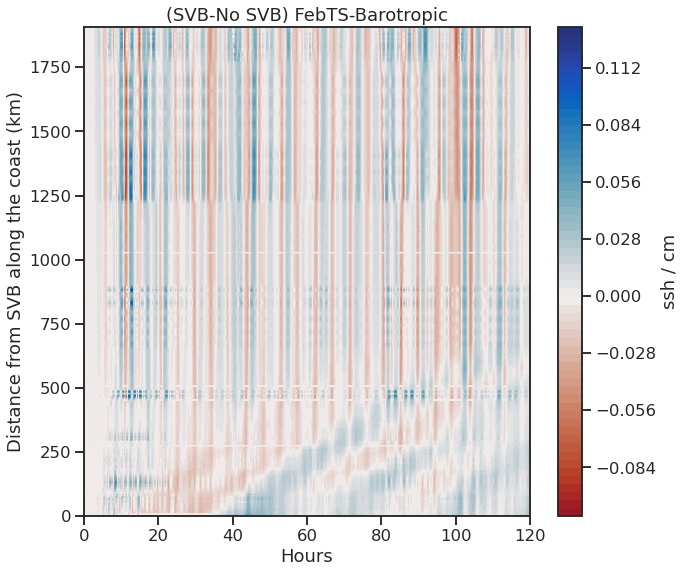

In [28]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

sshTSFeb = SVB.curtain_data.data-noSVB.curtain_data.data
sshBaro = SVB_bar.curtain_data.data-noSVB_bar.curtain_data.data

pc = ax.contourf((SVB.t[:]*600)/3600,SVB.X[:],np.transpose((sshTSFeb-sshBaro)*100), 61,
                vmin=-0.15, vmax=0.15, cmap=cmo.cm.balance_r)
cb = plt.colorbar(pc,label='ssh / cm')

ax.set_xlim(0,24*5)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('(SVB-No SVB) FebTS-Barotropic')

In [20]:
SVB.t

<xarray.DataArray 't' (t: 720)>
array([  0,   1,   2, ..., 717, 718, 719])
Dimensions without coordinates: t

In [9]:
sshTSFeb

<xarray.DataArray 'curtain_data' (t: 720, x: 555)>
array([[ 3.04700879e-14,  2.36288497e-14,  2.35063550e-14, ...,
        -2.72036489e-16, -1.31938331e-15,  5.21960972e-16],
       [ 2.50257355e-11,  2.14534227e-11,  1.97958878e-11, ...,
        -5.14390912e-15, -7.09172491e-15, -4.39494226e-15],
       [ 1.29241589e-09,  9.83989639e-10,  7.64122430e-10, ...,
        -7.14193880e-14,  3.80154739e-15,  2.56630519e-14],
       ...,
       [ 1.71115014e-04,  1.68824242e-04,  1.63369942e-04, ...,
        -2.61699329e-05, -2.62031812e-05, -2.35236442e-05],
       [ 1.73387432e-04,  1.71178652e-04,  1.65809288e-04, ...,
        -1.72074597e-05, -1.65624554e-05, -1.04014611e-05],
       [ 1.76877826e-04,  1.74635604e-04,  1.69247952e-04, ...,
        -2.08253976e-05, -2.01669859e-05, -1.53856904e-05]])
Dimensions without coordinates: t, x